### **Objective:**
To understand and gain insights from a retail dataset by performing various exploratory data analyses, data visualization, and data modelling.

### **Dataset Columns:**

- **InvoiceNo:** Invoice number. A unique number per invoice.
- **StockCode:** Product code. A unique number per product.
- **Description:** Product description.
- **Quantity:** The number of products sold per invoice.
- **InvoiceDate:** The date and time of the invoice.
- **UnitPrice:** The price of one unit of the product.
- **CustomerID:** Customer identification number.
- **Country:** The country where the customer resides.


## 1. Data Preprocessing and Cleaning:


1.1. Import necessary libraries and read the dataset:

In [1]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Sales_data.csv", encoding='latin-1')

1.2. Display the top 10 rows of the dataframe:

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


1.3. Check for missing values:



In [4]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.replace("  ", np.nan)

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

1.4. Convert the InvoiceDate column to datetime format:



In [8]:
df['InvoiceDate'] =pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

1.5. Add a new column 'TotalPrice' to the dataframe which is the product of 'UnitPrice' and 'Quantity':



In [9]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## 2. Exploratory Data Analysis:


2.1. How many unique products are there in the dataset?


In [10]:
df['StockCode'].nunique()

4070

2.2. Which are the top 10 products (using StockCode) sold by quantity?



In [11]:
top10_products = df.groupby('StockCode')['Quantity'].sum().reset_index()
top10_products = top10_products.sort_values(by='Quantity', ascending=False)
top10_products = top10_products.head(10)
print('Top 10 products by Quantity')
top10_products

Top 10 products by Quantity


,StockCode,Quantity
1147,22197,56450
2997,84077,53847
3515,85099B,47363
3536,85123A,38830
3305,84879,36221
454,21212,36039
1982,23084,30646
1412,22492,26437
1530,22616,26315
966,21977,24753


2.3. How many unique customers are there in the dataset?



In [12]:
df['CustomerID'].nunique()

4372

2.4. Which country has the maximum number of unique customers?



In [13]:
country_by_customers= df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

top_country_by_customers = country_by_customers.index[0]
top_country_by_customers

'United Kingdom'

2.5. Visualize the distribution of 'TotalPrice' using a histogram.



In [14]:
total_price_by_invoice = df.groupby('InvoiceNo')['TotalPrice'].sum()
total_price_by_invoice

InvoiceNo
536365        139.12
536366         22.20
536367        278.73
536368         70.05
536369         17.85
             ...    
C581484   -168469.60
C581490       -32.53
C581499      -224.69
C581568       -54.75
C581569        -7.50
Name: TotalPrice, Length: 25900, dtype: float64

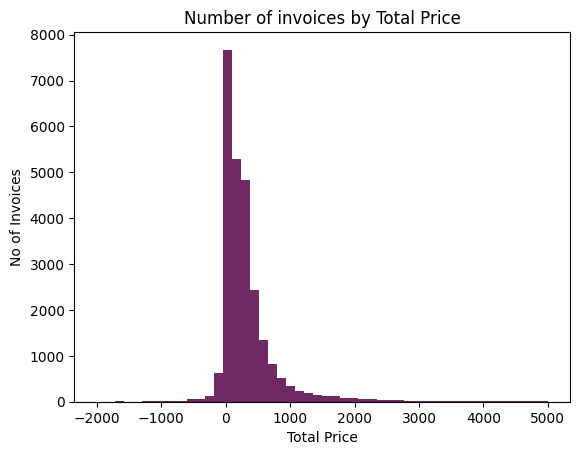

In [15]:
plt.hist(total_price_by_invoice, bins= 50, range=[-2000, 5000], color='#702963')
plt.title("Number of invoices by Total Price")
plt.xlabel("Total Price")
plt.ylabel("No of Invoices")

plt.show()


In [16]:
total_price_0 = df[(df['UnitPrice']==0) & (df['Quantity']<0) & (df['Description'].notna())]
total_price_0[['StockCode', 'Quantity','Description','UnitPrice','TotalPrice']]

,StockCode,Quantity,Description,UnitPrice,TotalPrice
7313,21275,-30,?,0.0,-0.0
13217,84968F,-20,check,0.0,-0.0
13218,84968E,-35,check,0.0,-0.0
13264,35833G,-43,damages,0.0,-0.0
21338,22423,-13,faulty,0.0,-0.0
...,...,...,...,...,...
535333,23395,-26,check,0.0,-0.0
535335,22578,-1050,lost,0.0,-0.0
535336,22576,-30,check,0.0,-0.0
536908,23090,-338,missing,0.0,-0.0


## 3. Data Aggregation:


3.1. Compute the total sales (TotalPrice) per country.



In [17]:
sales_per_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
sales_per_country

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

3.2. Identify the month in which the sales were highest.



In [18]:
sales_per_month = df.groupby(df['InvoiceDate'].dt.month)['TotalPrice'].sum().sort_values(ascending=False).reset_index()
sales_per_month

,InvoiceDate,TotalPrice
0,11,1461756.250
1,12,1182625.030
2,10,1070704.670
3,9,1019687.622
4,5,723333.510
5,6,691123.120
6,3,683267.080
7,8,682680.510
8,7,681300.111
9,1,560000.260


In [19]:
#highest month sales
max_sales_month = sales_per_month.loc[sales_per_month['TotalPrice'].idxmax()]
max_sales_month

InvoiceDate         11.00
TotalPrice     1461756.25
Name: 0, dtype: float64

3.3. Compute the average unit price per product.



In [20]:
avg_unit_price = df.groupby('StockCode')['UnitPrice'].mean().sort_values(ascending=False).reset_index()
avg_unit_price

,StockCode,UnitPrice
0,AMAZONFEE,7324.784706
1,CRUK,495.839375
2,M,375.566392
3,DOT,290.495859
4,BANK CHARGES,202.855162
...,...,...
4065,84526,0.000000
4066,72732,0.000000
4067,85018B,0.000000
4068,35824B,0.000000


3.4. Compute the total quantity sold per customer.



In [21]:
sell_per_customer = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).reset_index()
sell_per_customer

,CustomerID,Quantity
0,14646.0,196719
1,12415.0,77242
2,14911.0,77180
3,17450.0,69029
4,18102.0,64122
...,...,...
4367,16252.0,-158
4368,16742.0,-189
4369,14213.0,-244
4370,15823.0,-283


## 4. Data Visualization:


4.1. Create a bar chart showcasing the sales (TotalPrice) for each country.



Text(0.5, 0, 'Sales (in million $)')

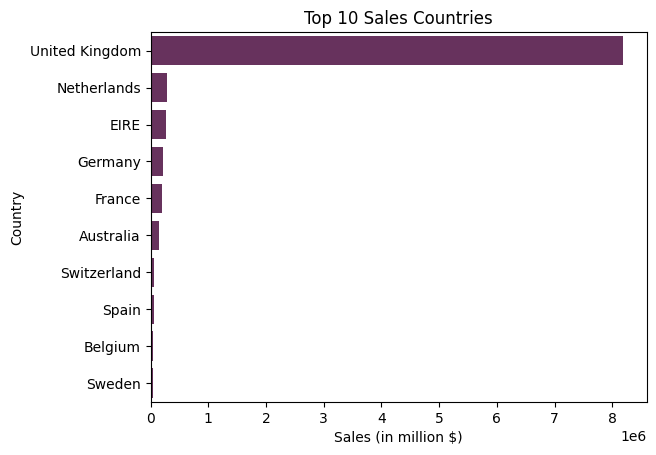

In [22]:
top = 10

sns.barplot(x = sales_per_country[:top].values, y=sales_per_country[:top].index, color='#702963')
plt.title(f"Top {top} Sales Countries")
plt.xlabel("Sales (in million $)")

4.2. Plot a line graph to showcase the trend of sales over time.



In [23]:
#creating a series aggregating sales and dates
sales_over_time = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

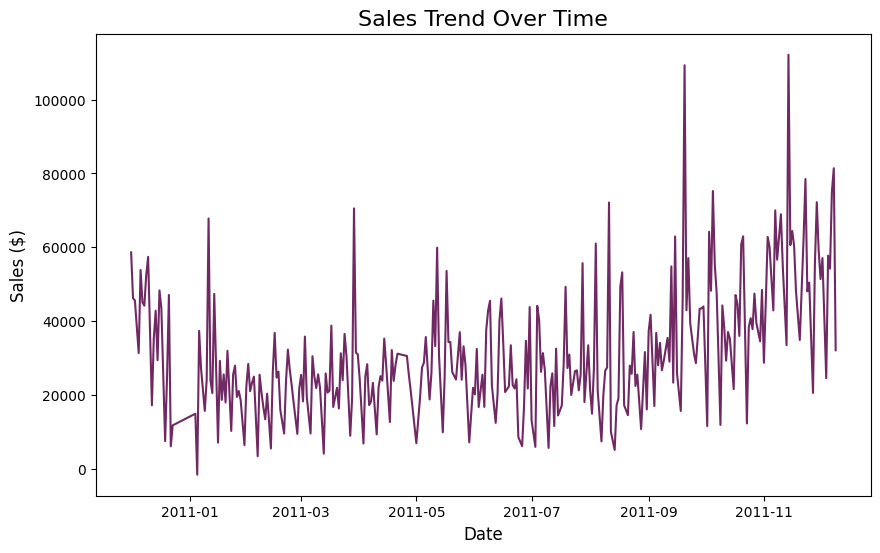

In [24]:
# Plotting the line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(sales_over_time, color = '#702963')

# Add labels and title
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# Show the plot
plt.show()

4.3. Use a scatter plot to visualize the relationship between UnitPrice and Quantity.



Text(0.5, 1.0, 'Quantity VS Unit Price')

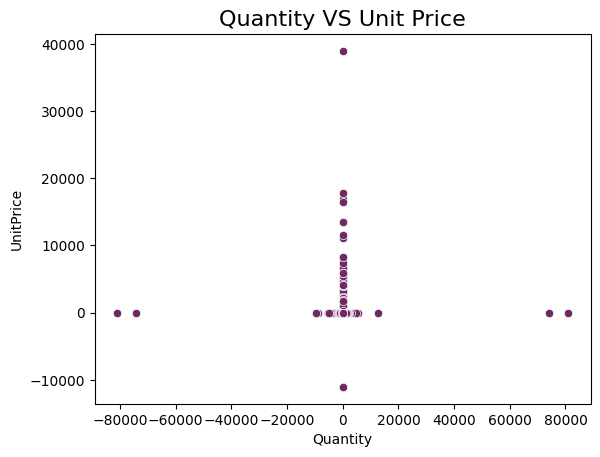

In [25]:
sns.scatterplot(data=df, x = 'Quantity', y='UnitPrice', color = '#702963')
plt.title("Quantity VS Unit Price", fontsize=16)

4.4. Plot a heatmap to display the correlation between numeric columns.



In [26]:
#extracting numeric columns
df_num = df.select_dtypes("number")

#correlation
correlation = df_num.corr()

#tick labels
matrix_cols = correlation.columns.tolist()

#convert to array
corr_array  = np.array(correlation)

correlation

,Quantity,UnitPrice,CustomerID,TotalPrice
Quantity,1.000000,-0.001235,-0.003600,0.886681
UnitPrice,-0.001235,1.000000,-0.004560,-0.162029
CustomerID,-0.003600,-0.004560,1.000000,-0.002274
TotalPrice,0.886681,-0.162029,-0.002274,1.000000


In [27]:
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## 5. Advanced Analysis:


5.1. Identify potential outliers in the dataset for the Quantity and UnitPrice columns using appropriate visualization techniques.



Text(0.5, 0, 'Unit Price')

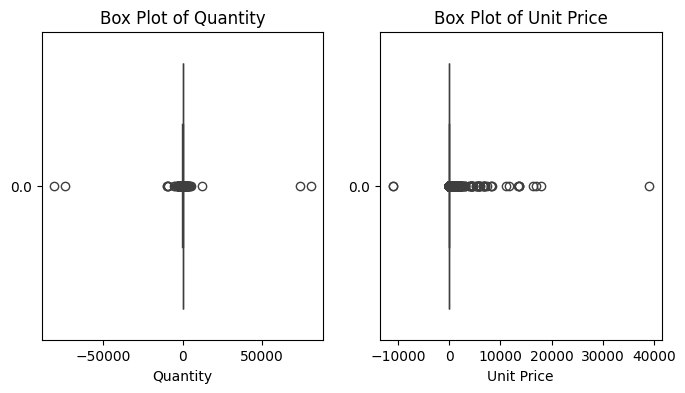

In [28]:
# Box plot for Quantity
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x=df['Quantity'],manage_ticks=True)
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')

# Box plot for UnitPrice
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df['UnitPrice'],manage_ticks=True)
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')

5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).



In [29]:
#calculating the total purchases and counts the frequency of purchases.
customer_segments = df.groupby('CustomerID').agg(
    TotalPurchases=('TotalPrice', 'sum'),
    Frequency=('TotalPrice', 'count')
).reset_index()
customer_segments

,CustomerID,TotalPurchases,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [30]:
total_purchase_bins = pd.qcut(customer_segments['TotalPurchases'], q=3, labels=['Low', 'Medium', 'High'])
frequency_bins = pd.qcut(customer_segments['Frequency'], q=3, labels=['Low', 'Medium', 'High'])

# Add segments to the DataFrame
customer_segments['PurchaseSegment'] = total_purchase_bins
customer_segments['FrequencySegment'] = frequency_bins

# Display the resulting segmentation DataFrame
print(customer_segments)


      CustomerID  TotalPurchases  Frequency PurchaseSegment FrequencySegment
0        12346.0            0.00          2             Low              Low
1        12347.0         4310.00        182            High             High
2        12348.0         1797.24         31            High           Medium
3        12349.0         1757.55         73            High           Medium
4        12350.0          334.40         17             Low              Low
...          ...             ...        ...             ...              ...
4367     18280.0          180.60         10             Low              Low
4368     18281.0           80.82          7             Low              Low
4369     18282.0          176.60         13             Low              Low
4370     18283.0         2094.88        756            High             High
4371     18287.0         1837.28         70            High           Medium

[4372 rows x 5 columns]


5.3. For the top 5 products (by quantity sold), visualize their monthly sales trend.



Text(0.5, 1.0, 'Sales Trend of Top 5 Products (Quantity)')

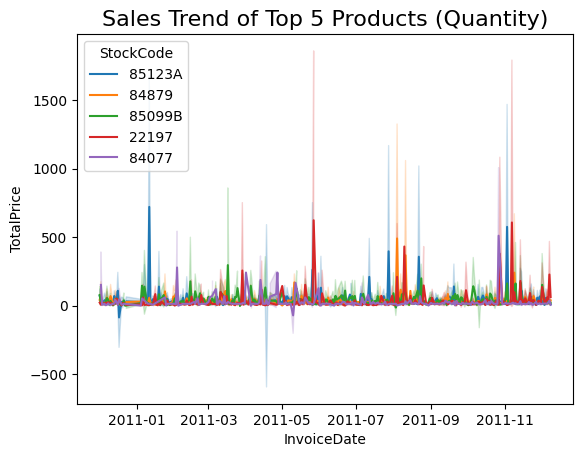

In [31]:
#taking the top 5 product from an already created series
top5 = list(top10_products[:5]["StockCode"])

#slicing from the main df only the rows of those products
top5_df = df[df['StockCode'].isin(top5)]

sns.lineplot(x = top5_df['InvoiceDate'].dt.date,
             y = top5_df['TotalPrice'],
             hue = top5_df['StockCode'])
plt.title("Sales Trend of Top 5 Products (Quantity)", fontsize=16)

# Advanced Machine Learning Analysis with Retail Dataset



## 6. Feature Engineering:

6.1 Extract 'Year', 'Month', 'Day', and 'Hour' from the InvoiceDate and create separate columns for each.


In [32]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

6.2 Create a new column `'ReturnFlag'` where if `'Quantity'` is less than zero, it's 1, otherwise 0. This will indicate whether an item was returned.


In [33]:
df['ReturnFlag'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)

## 7. Customer Segmentation using Clustering:

7.1. Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

In [34]:
# Set a date to calculate Recency from (e.g., today or end of the analysis period)
#current_date = dt.datetime.now().date()
current_date = df['InvoiceDate'].max().date()

# Group by customer_id and aggregate to calculate RFM metrics
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.dt.date.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={
    'InvoiceDate': 'recency',
    'InvoiceNo': 'frequency',
    'TotalPrice': 'monetary'
}).reset_index()


5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).

Moved here from task 5

In [35]:
# Assign R, F, M scores using quantiles
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])
rfm_df['freq_score'] = pd.cut(rfm_df['frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores into a single score (optional)
rfm_df['rfm_score'] = rfm_df['r_score'].astype(str) + rfm_df['freq_score'].astype(str) + rfm_df['m_score'].astype(str)

# Define segments based on RFM scores
def segment_customers(df):
    if df['rfm_score'] in ['444', '344', '434', '443']:
        return 'Best Customers'
    elif df['rfm_score'][1] in ['4', '3']:
        return 'Loyal Customers'
    elif df['rfm_score'][2] in ['4', '3']:
        return 'Big Spenders'
    elif df['rfm_score'][:2] == '11':
        return 'Hibernating'
    elif df['rfm_score'][0] in ['1', '2']:
        return 'At Risk'
    else:
        return 'Other'

rfm_df['segment'] = rfm_df.apply(segment_customers, axis=1)

rfm_df

,CustomerID,recency,frequency,monetary,r_score,freq_score,m_score,rfm_score,segment
0,12346.0,325,2,0.00,1,1,1,111,Hibernating
1,12347.0,2,7,4310.00,4,1,4,414,Big Spenders
2,12348.0,75,4,1797.24,2,1,4,214,Big Spenders
3,12349.0,18,1,1757.55,3,1,4,314,Big Spenders
4,12350.0,310,1,334.40,1,1,2,112,Hibernating
...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,1,111,Hibernating
4368,18281.0,180,1,80.82,1,1,1,111,Hibernating
4369,18282.0,7,3,176.60,4,1,1,411,Other
4370,18283.0,3,16,2094.88,4,1,4,414,Big Spenders


7.2. Normalize the RFM matrix with StandardScaler:

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selecting the RFM columns for scaling
rfm_df[['recency', 'frequency', 'monetary']] = scaler.fit_transform(rfm_df[['recency', 'frequency', 'monetary']])

rfm_df

,CustomerID,recency,frequency,monetary,r_score,freq_score,m_score,rfm_score,segment
0,12346.0,2.316568,-0.329362,-0.231001,1,1,1,111,Hibernating
1,12347.0,-0.889050,0.206102,0.293432,4,1,4,414,Big Spenders
2,12348.0,-0.164560,-0.115176,-0.012316,2,1,4,214,Big Spenders
3,12349.0,-0.730258,-0.436455,-0.017146,3,1,4,314,Big Spenders
4,12350.0,2.167700,-0.436455,-0.190312,1,1,2,112,Hibernating
...,...,...,...,...,...,...,...,...,...
4367,18280.0,1.840191,-0.436455,-0.209026,1,1,1,111,Hibernating
4368,18281.0,0.877514,-0.436455,-0.221167,1,1,1,111,Hibernating
4369,18282.0,-0.839427,-0.222269,-0.209513,4,1,1,411,Other
4370,18283.0,-0.879125,1.169939,0.023900,4,1,4,414,Big Spenders


7.3. Use KMeans clustering to segment customers into different groups. Determine the optimal number of clusters using the Elbow method.

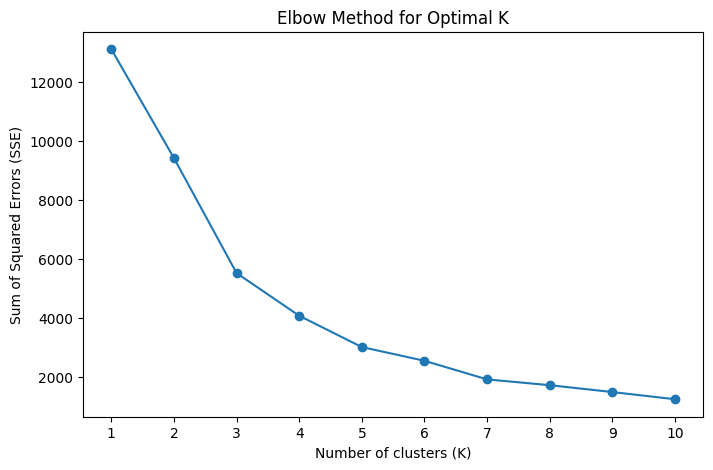

array([1, 0, 2])

In [74]:
from sklearn.cluster import KMeans

rfm_scaled = rfm_df[['recency', 'frequency', 'monetary']]

# Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.show()





In [76]:
# Creating clusters based on elbow method
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_df['cluster'].unique()

array([1, 0, 2])

## 8. Predictive Analytics:

8.1. Can you predict if a customer will return an item? Use the 'ReturnFlag' as the target variable and build a classification model.

- Split data into training and test sets.
- Use features like 'UnitPrice', 'Quantity', etc.
- Evaluate model accuracy, precision, recall, and F1-score.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X = df[['UnitPrice', 'Quantity']]
y = df['ReturnFlag']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


8.2. Predict the `'TotalPrice'` for an invoice using regression models.
- Consider relevant features and handle categorical ones appropriately (e.g., with one-hot encoding).
- Split data, train the model, and evaluate its performance using metrics like MAE, RMSE, and R^2.

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.preprocessing import OneHotEncoder

X = df[['UnitPrice', 'Quantity', 'Country']]
y = df['TotalPrice']

X = pd.get_dummies(X, columns=['Country'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

In [43]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.05
Root Mean Squared Error (RMSE): 391.02
R² Score: 0.53


## 9. Association Rule Mining:
- 9.1 Identify frequently bought products together. Use the Apriori algorithm to extract meaningful association rules.
- 9.2 Based on the rules, suggest product bundling strategies to the retail store.

In [90]:
from mlxtend.frequent_patterns import apriori, association_rules
# Create a matrix where each transaction (InvoiceNo) is a row and each product (StockCode) is a column
transf = df.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().fillna(0)
transf

StockCode,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# Convert the quantities to binary (1 or 0) to indicate whether a product was bought or not
# If a product quantity is greater than 0, it will be set to 1 (bought), otherwise 0 (not bought)
basket = transf.applymap(lambda x: 1 if x > 0 else 0)
basket

StockCode,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# min_support is the threshold for how frequently an itemset must appear in transactions
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True, low_memory=True)
frequent_itemsets

c:\Users\podop\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.020000,(15036)
1,0.012394,(15056BL)
2,0.017606,(15056N)
3,0.011197,(16237)
4,0.012432,(20675)
...,...,...
1060,0.010193,"(85099B, 23199, 23203)"
1061,0.011351,"(23202, 85099B, 23203)"
1062,0.010039,"(22355, 20719, 20724, 20723)"
1063,0.010347,"(22386, 22411, 85099B, 21931)"


In [95]:
# We use 'confidence' as the metric to filter the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(20711),(20712),0.020193,0.033320,0.011158,0.552581,16.583841,0.010485,2.160570,0.959067
1,(20711),(21931),0.020193,0.045714,0.011506,0.569790,12.464149,0.010583,2.218184,0.938726
2,(20711),(22386),0.020193,0.047027,0.010888,0.539197,11.465682,0.009938,2.068070,0.931595
3,(20711),(22411),0.020193,0.045367,0.010270,0.508604,11.210935,0.009354,1.942697,0.929572
4,(20711),(85099B),0.020193,0.080772,0.013282,0.657744,8.143195,0.011651,2.685788,0.895276
...,...,...,...,...,...,...,...,...,...,...
373,"(22698, 22697, 22699)",(22423),0.020927,0.076795,0.011622,0.555351,7.231563,0.010015,2.076253,0.880136
374,"(22698, 22423)","(22699, 22697)",0.015135,0.029653,0.011622,0.767857,25.895182,0.011173,4.179958,0.976157
375,"(22423, 22697)","(22698, 22699)",0.019653,0.023127,0.011622,0.591356,25.569466,0.011167,2.390520,0.980153
376,"(22423, 22699)","(22698, 22697)",0.020270,0.024440,0.011622,0.573333,23.458662,0.011126,2.286468,0.977180


In [48]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

               antecedents     consequents   support  confidence       lift
0                  (20711)         (20712)  0.011158    0.552581  16.583841
1                  (20711)         (21931)  0.011506    0.569790  12.464149
2                  (20711)         (22386)  0.010888    0.539197  11.465682
3                  (20711)         (22411)  0.010270    0.508604  11.210935
4                  (20711)        (85099B)  0.013282    0.657744   8.143195
..                     ...             ...       ...         ...        ...
373  (22698, 22697, 22699)         (22423)  0.011622    0.555351   7.231563
374         (22698, 22423)  (22699, 22697)  0.011622    0.767857  25.895182
375         (22423, 22697)  (22698, 22699)  0.011622    0.591356  25.569466
376         (22423, 22699)  (22698, 22697)  0.011622    0.573333  23.458662
377         (22698, 22699)  (22423, 22697)  0.011622    0.502504  25.569466

[378 rows x 5 columns]


In [49]:
#Second method...Need to check more on this

In [79]:
from apyori import apriori

# Prepare the data: each transaction should be a list of items bought together
transactions = df.groupby('InvoiceNo')['StockCode'].apply(list).tolist()

# Apply the Apriori algorithm
results = apriori(transactions, min_support=0.01, min_confidence=0.5, min_lift=1.2)

# Convert results to a list
rules = list(results)

# Print each rule
for rule in rules:
    for ordered_stat in rule.ordered_statistics:
        antecedent = list(ordered_stat.items_base)  # LHS of the rule
        consequent = list(ordered_stat.items_add)   # RHS of the rule
        print(f"Rule: {antecedent} -> {consequent}")
        print(f"Support: {rule.support}")
        print(f"Confidence: {ordered_stat.confidence}")
        print(f"Lift: {ordered_stat.lift}\n")


Rule: ['20711'] -> ['20712']
Support: 0.011158301158301158
Confidence: 0.543233082706767
Lift: 16.1350193143409

Rule: ['20711'] -> ['21931']
Support: 0.011505791505791505
Confidence: 0.5601503759398496
Lift: 12.079845742582936

Rule: ['20711'] -> ['22386']
Support: 0.010888030888030888
Confidence: 0.5300751879699249
Lift: 11.152678609602807

Rule: ['20711'] -> ['22411']
Support: 0.01027027027027027
Confidence: 0.5
Lift: 10.909856781802866

Rule: ['20711'] -> ['85099B']
Support: 0.013436293436293436
Confidence: 0.6541353383458647
Lift: 7.935412301244916

Rule: ['20711'] -> ['DOT']
Support: 0.01054054054054054
Confidence: 0.5131578947368421
Lift: 18.719421793921423

Rule: ['20712'] -> ['21931']
Support: 0.017374517374517374
Confidence: 0.5160550458715597
Lift: 11.128913978412486

Rule: ['20712'] -> ['85099B']
Support: 0.020772200772200773
Confidence: 0.6169724770642203
Lift: 7.48458414799218

Rule: ['DOT'] -> ['20712']
Support: 0.013938223938223937
Confidence: 0.5084507042253521
Lift: 1

# Advanced EDA Techniques:

## 11. Pareto Analysis (80/20 Rule):
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

In [99]:


Pro_revenue = df.groupby('StockCode')['TotalPrice'].sum().reset_index()

product_revenue_sort_listed = Pro_revenue.sort_values(by='TotalPrice', ascending=False)

product_revenue_sort_listed['CumulativeRevenue'] = product_revenue_sort_listed['TotalPrice'].cumsum()

threshold = 0.8 * Pro_revenue['TotalPrice'].sum()
topProducts = product_revenue_sort_listed[product_revenue_sort_listed['CumulativeRevenue'] <= threshold]

print(topProducts.sort_values(by='CumulativeRevenue', ascending=False))

     StockCode  TotalPrice  CumulativeRevenue
2132     23239     3283.69         7795649.43
1760     22855     3289.23         7792365.74
1036     22079     3298.89         7789076.51
2992    84032A     3308.28         7785777.62
1117     22165     3315.45         7782469.34
...        ...         ...                ...
3515    85099B    92356.03          659561.18
3536    85123A    97894.50          567205.15
2733     47566    98302.98          469310.65
1348     22423   164762.19          371007.67
4059       DOT   206245.48          206245.48

[736 rows x 3 columns]


In [101]:
cust_sales = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()

cust_sales_sorted = cust_sales.sort_values(by='TotalPrice', ascending=False)

cust_sales_sorted['CumulativeSales'] = cust_sales_sorted['TotalPrice'].cumsum()

threshold = 0.8 * cust_sales['TotalPrice'].sum()
top_Users = cust_sales_sorted[cust_sales_sorted['CumulativeSales'] <= threshold]

print(top_Users.sort_values(by='CumulativeSales',ascending=False))

      CustomerID  TotalPrice  CumulativeSales
2642     15916.0     1491.24      6639188.701
741      13320.0     1491.70      6637697.461
2911     16279.0     1496.68      6636205.761
3846     17571.0     1498.51      6634709.081
3263     16762.0     1501.38      6633210.571
...          ...         ...              ...
55       12415.0   123725.45       979707.750
1895     14911.0   132572.62       855982.300
3758     17450.0   187482.17       723409.680
4233     18102.0   256438.49       535927.510
1703     14646.0   279489.02       279489.020

[1170 rows x 3 columns]


## 12. Time-Series Anomalies:
- Detect any anomalies or outliers in the sales data over time using rolling averages or other advanced methods.

In [33]:
# Converting 'InvoiceDate' to a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Sorting data by 'InvoiceDate'
sales_data = df.sort_values(by='InvoiceDate')

# Creating a column for total sales value (Quantity * UnitPrice)
sales_data['TotalSales'] = sales_data['Quantity'] * sales_data['UnitPrice']

# Setting 'InvoiceDate' as the index for easier time-based operations
sales_data.set_index('InvoiceDate', inplace=True)

# Calculating the rolling average for 'TotalSales' over a 7-day window
sales_data['RollingAvg'] = sales_data['TotalSales'].rolling(window='7D').mean()

# Identifying outliers: those values that deviate significantly from the rolling average
# We'll flag sales that are 3 standard deviations away from the rolling average
sales_data['SalesDeviation'] = (sales_data['TotalSales'] - sales_data['RollingAvg']).abs()
threshold = 3 * sales_data['SalesDeviation'].std()

# Filtering out potential anomalies
anomalies = sales_data[sales_data['SalesDeviation'] > threshold]

anomalies.head()


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,TotalSales,RollingAvg,SalesDeviation
InvoiceDate,,,,,,,,,,,
2010-12-01 12:27:00,536477,21137,BLACK RECORD COVER FRAME,480,3.39,16210.0,United Kingdom,1627.2,1627.2,26.327782,1600.872218
2010-12-02 15:22:00,536785,22423,REGENCY CAKESTAND 3 TIER,144,10.95,15061.0,United Kingdom,1576.8,1576.8,19.815347,1556.984653
2010-12-02 17:38:00,536830,21915,RED HARMONICA IN BOX,1400,1.06,16754.0,United Kingdom,1484.0,1484.0,20.321405,1463.678595
2010-12-03 13:12:00,536970,22423,REGENCY CAKESTAND 3 TIER,120,10.95,17949.0,United Kingdom,1314.0,1314.0,19.635947,1294.364053
2010-12-06 09:45:00,537235,22622,BOX OF VINTAGE ALPHABET BLOCKS,156,8.50,17381.0,United Kingdom,1326.0,1326.0,18.112922,1307.887078


# Advanced Modeling Techniques:

## 15. Churn Prediction:
- Predict if a customer will stop buying products in the near future.
- Features can include Recency, Frequency, Monetary values, average time between purchases, total categories bought, etc.

In [ ]:
# Define the churn threshold
churn_threshold = pd.to_datetime(df['InvoiceDate'].max().date() - dt.timedelta(days=90))  # 3 months

# Get the last purchase date for each customer
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase.columns = ['CustomerID', 'last_purchase_date']

# Merge last purchase date with customers dataset
rfm_df = rfm_df.merge(last_purchase, on='CustomerID', how='left')

# Create the churn column (1 = churn, 0 = not churned)
rfm_df['churn'] = rfm_df['last_purchase_date'].apply(lambda x: 1 if x < churn_threshold else 0)

In [ ]:
# Sort transactions by customer_id and purchase_date
df = df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Drop duplicates within the same customer based on InvoiceNo
transactions_unique = df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'])

# Calculate the time difference between purchases (in days)
transactions_unique['time_diff'] = transactions_unique.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Group by customer and calculate the average time difference
avg_time_between_purchases = transactions_unique.groupby('CustomerID')['time_diff'].mean().reset_index()

# Rename the column for clarity
avg_time_between_purchases.columns = ['CustomerID', 'avg_time_between_purchases']

# merging results in the rfm_df
rfm_df = rfm_df.merge(avg_time_between_purchases, on='CustomerID', how='left')

# filling NaN values
rfm_df.fillna({'avg_time_between_purchases': 0}, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = RandomForestClassifier(random_state=1910)

In [ ]:
X = rfm_df.drop(['CustomerID','churn', 'cluster', 'last_purchase_date'], axis = 1)
X = pd.get_dummies(X, columns=['segment'], dtype=int)

y = rfm_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

churn_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, churn_pred)
conf_matrix = confusion_matrix(y_test, churn_pred)
class_report = classification_report(y_test, churn_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[594   0]
 [  0 281]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       281

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [ ]:
# checking individual importances
importances = pd.DataFrame(clf.feature_importances_, X.columns)
importances

,0
recency,0.533118
frequency,0.013081
monetary,0.010795
r_score,0.144383
freq_score,0.000002
m_score,0.010736
rfm_score,0.174697
avg_time_between_purchases,0.008752
segment_At Risk,0.004095
segment_Best Customers,0.000000


In [ ]:
# now using only the recency as feature
X = pd.DataFrame(rfm_df['recency'])

y = rfm_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

churn_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, churn_pred)
conf_matrix = confusion_matrix(y_test, churn_pred)
class_report = classification_report(y_test, churn_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[594   0]
 [  0 281]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       281

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [ ]:
# simulating the prediction to a given customer

CustomerID= 12347.0

input = rfm_df[rfm_df['CustomerID'] == CustomerID]

X = pd.DataFrame(input['recency'])

print(f'Will the customer {CustomerID} churn [1 / 0] ?', clf.predict(X))

Will the customer 12347.0 churn [1 / 0] ? [0]
